# importing liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# Load  Train Dataset

In [2]:
train=pd.read_csv("train_h.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.shape

(1460, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

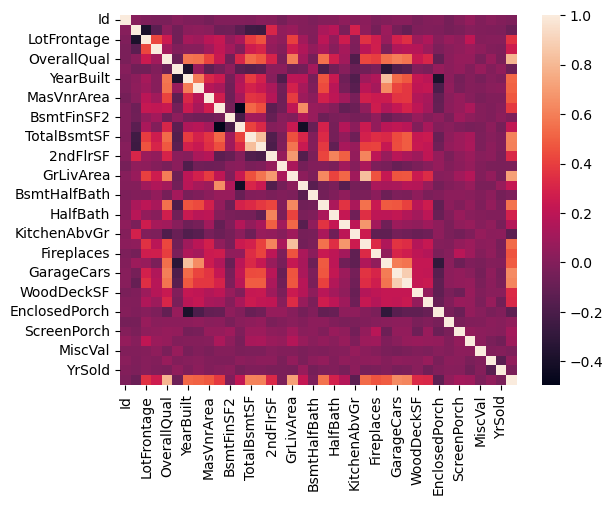

In [6]:
sns.heatmap(train.corr())

# Dropping irrelative columns

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Identify irrelevant columns
columns_to_drop = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage','Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','LowQualFinSF','KitchenAbvGr', 'KitchenQual','Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual',
       'GarageCond', 'PavedDrive','PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [10]:
# Remove the columns
train = train.drop(columns=columns_to_drop)

In [11]:
train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,8450,196.0,706,0,150,856,856,854,1710,1,...,3,8,548,0,61,0,0,0,0,208500
1,9600,0.0,978,0,284,1262,1262,0,1262,0,...,3,6,460,298,0,0,0,0,0,181500
2,11250,162.0,486,0,434,920,920,866,1786,1,...,3,6,608,0,42,0,0,0,0,223500
3,9550,0.0,216,0,540,756,961,756,1717,1,...,3,7,642,0,35,272,0,0,0,140000
4,14260,350.0,655,0,490,1145,1145,1053,2198,1,...,4,9,836,192,84,0,0,0,0,250000


In [12]:
train.shape

(1460, 23)

In [13]:
train.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

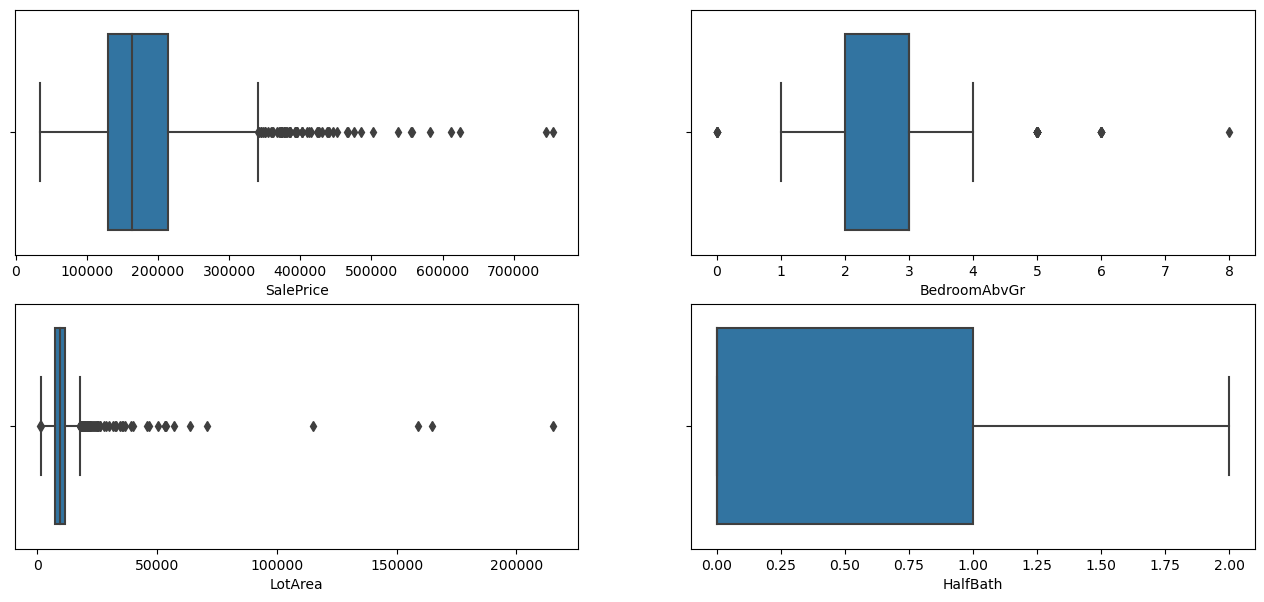

In [14]:
fig, axs = plt.subplots(2,2, figsize = (16,7))
plt1 = sns.boxplot(train['SalePrice'], ax = axs[0,0])
plt2 = sns.boxplot(train['LotArea'], ax = axs[1,0])
plt3 = sns.boxplot(train['BedroomAbvGr'], ax = axs[0,1])
plt4 = sns.boxplot(train['HalfBath'], ax = axs[1,1])

# Remove Missing Values in Train Data

In [15]:
train.isnull().sum()

LotArea          0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
SalePrice        0
dtype: int64

<AxesSubplot:>

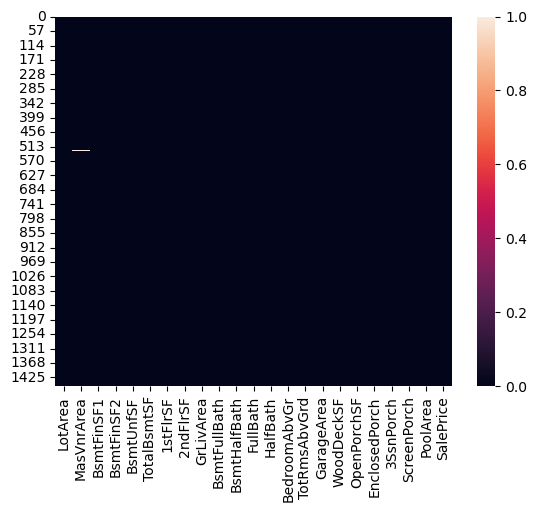

In [16]:
sns.heatmap(train.isnull())

In [17]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [18]:
correlation_matrix = train.corr()
correlation_matrix

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
LotArea,1.000000,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,...,0.119690,0.190015,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.263843
MasVnrArea,0.103960,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,0.389893,0.085055,...,0.102417,0.280027,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,0.475241
BsmtFinSF1,0.214103,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,...,-0.107355,0.044316,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.386420
BsmtFinSF2,0.111170,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.158678,...,-0.015728,-0.035227,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.011378
BsmtUnfSF,-0.002618,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,...,0.166643,0.250647,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,0.214479
TotalBsmtSF,0.260833,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,...,0.050450,0.285573,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,0.613581
1stFlrSF,0.299475,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,...,0.127401,0.409516,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,0.605852
2ndFlrSF,0.050986,0.174019,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,...,0.502901,0.616423,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.319334
GrLivArea,0.263116,0.389893,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,...,0.521270,0.825489,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,0.708624
BsmtFullBath,0.158155,0.085055,0.649212,0.158678,-0.422900,0.307351,0.244671,-0.169494,0.034836,1.000000,...,-0.150673,-0.053275,0.179189,0.175315,0.067341,-0.049911,-0.000106,0.023148,0.067616,0.227122


<AxesSubplot:>

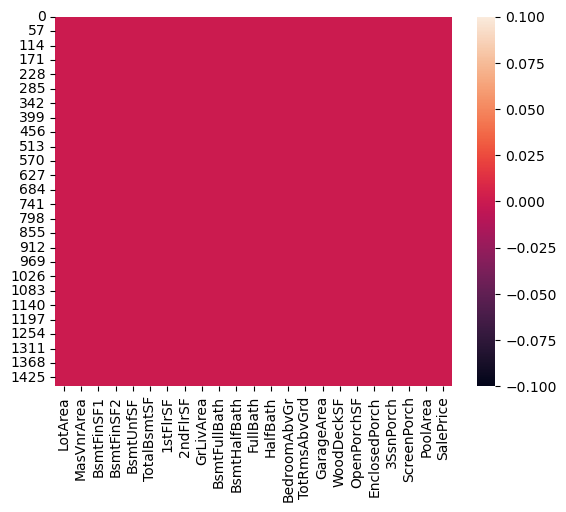

In [19]:
sns.heatmap(train.isnull())


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   MasVnrArea     1460 non-null   float64
 2   BsmtFinSF1     1460 non-null   int64  
 3   BsmtFinSF2     1460 non-null   int64  
 4   BsmtUnfSF      1460 non-null   int64  
 5   TotalBsmtSF    1460 non-null   int64  
 6   1stFlrSF       1460 non-null   int64  
 7   2ndFlrSF       1460 non-null   int64  
 8   GrLivArea      1460 non-null   int64  
 9   BsmtFullBath   1460 non-null   int64  
 10  BsmtHalfBath   1460 non-null   int64  
 11  FullBath       1460 non-null   int64  
 12  HalfBath       1460 non-null   int64  
 13  BedroomAbvGr   1460 non-null   int64  
 14  TotRmsAbvGrd   1460 non-null   int64  
 15  GarageArea     1460 non-null   int64  
 16  WoodDeckSF     1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  Enclosed

# Normalization in Train Data


<AxesSubplot:xlabel='SalePrice', ylabel='count'>

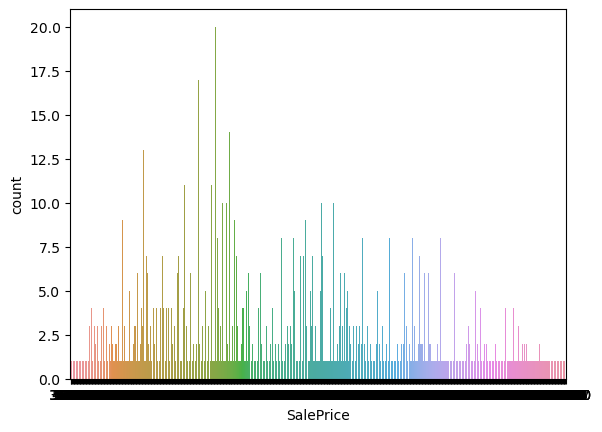

In [21]:
sns.countplot(x='SalePrice' , data=train )

In [22]:
st= StandardScaler()

# Select the columns to be scaled
columns_to_scale = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the selected columns
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

# Verify the changes
print(train.head())

    LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0  0.033420     0.12250    0.125089         0.0   0.064212     0.140098   
1  0.038795     0.00000    0.173281         0.0   0.121575     0.206547   
2  0.046507     0.10125    0.086109         0.0   0.185788     0.150573   
3  0.038561     0.00000    0.038271         0.0   0.231164     0.123732   
4  0.060576     0.21875    0.116052         0.0   0.209760     0.187398   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  BedroomAbvGr  \
0  0.119780  0.413559   0.259231      0.333333  ...         0.375   
1  0.212942  0.000000   0.174830      0.000000  ...         0.375   
2  0.134465  0.419370   0.273549      0.333333  ...         0.375   
3  0.143873  0.366102   0.260550      0.333333  ...         0.375   
4  0.186095  0.509927   0.351168      0.333333  ...         0.500   

   TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0      0.500000    0.386460    0.000000     0.111517       0.00

In [23]:
train= pd.DataFrame(st.fit_transform(train))
train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.207142,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,0.370333,1.107810,...,0.163779,0.912210,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.347273
1,-0.091886,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.819964,...,0.163779,-0.318683,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,0.007288
2,0.073480,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,0.515013,1.107810,...,0.163779,-0.318683,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.536154
3,-0.096897,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,0.383659,1.107810,...,0.163779,0.296763,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.515281
4,0.375148,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.299326,1.107810,...,1.390023,1.527656,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.574410,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,0.250402,-0.819964,...,0.163779,0.296763,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.074560
1456,0.266407,0.084843,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,1.061367,1.107810,...,0.163779,0.296763,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,0.366161
1457,-0.147810,-0.574410,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,1.569647,-0.819964,...,1.390023,1.527656,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,1.077611
1458,-0.080160,-0.574410,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.832788,1.107810,...,-1.062465,-0.934130,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.488523


In [24]:
train.shape

(1460, 23)

# Load Test Data

In [26]:
test=pd.read_csv("test_h.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Drop irrelative columns in Test Data

In [27]:
test = test.drop(columns=columns_to_drop)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1459 non-null   int64  
 1   MasVnrArea     1444 non-null   float64
 2   BsmtFinSF1     1458 non-null   float64
 3   BsmtFinSF2     1458 non-null   float64
 4   BsmtUnfSF      1458 non-null   float64
 5   TotalBsmtSF    1458 non-null   float64
 6   1stFlrSF       1459 non-null   int64  
 7   2ndFlrSF       1459 non-null   int64  
 8   GrLivArea      1459 non-null   int64  
 9   BsmtFullBath   1457 non-null   float64
 10  BsmtHalfBath   1457 non-null   float64
 11  FullBath       1459 non-null   int64  
 12  HalfBath       1459 non-null   int64  
 13  BedroomAbvGr   1459 non-null   int64  
 14  TotRmsAbvGrd   1459 non-null   int64  
 15  GarageArea     1458 non-null   float64
 16  WoodDeckSF     1459 non-null   int64  
 17  OpenPorchSF    1459 non-null   int64  
 18  Enclosed

In [29]:
test.shape

(1459, 22)

In [30]:
test.isnull().sum()

LotArea           0
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
dtype: int64

# Remove Missing Values in Test Data

<AxesSubplot:>

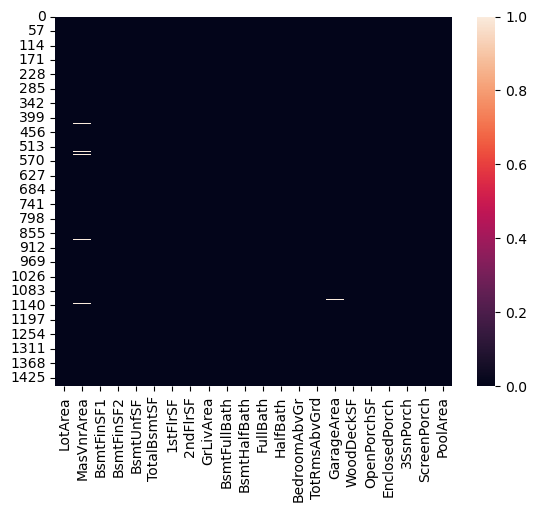

In [31]:
sns.heatmap(test.isnull())

In [32]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

<AxesSubplot:>

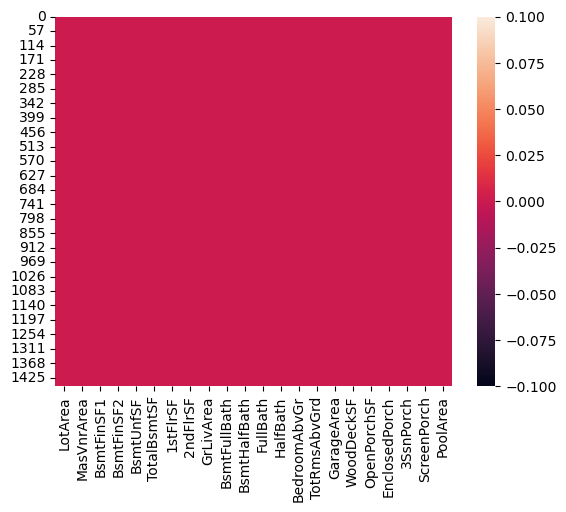

In [33]:
sns.heatmap(test.isnull())


# Normalization in Test data

In [34]:
st= StandardScaler()

# Select the columns to be scaled
columns_to_scale = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea' ]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the selected columns
test[columns_to_scale] = scaler.fit_transform(test[columns_to_scale])

# Verify the changes
print(test.head())

    LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0  0.184147    0.000000    0.116708    0.094364   0.126168     0.173111   
1  0.232124    0.083721    0.230175    0.000000   0.189720     0.260844   
2  0.224197    0.000000    0.197257    0.000000   0.064019     0.182139   
3  0.154326    0.015504    0.150125    0.000000   0.151402     0.181747   
4  0.064121    0.000000    0.065586    0.000000   0.475234     0.251227   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  HalfBath  BedroomAbvGr  \
0  0.104309  0.000000   0.104309           0.0  ...       0.0      0.333333   
1  0.196672  0.000000   0.196672           0.0  ...       0.5      0.500000   
2  0.111135  0.376477   0.260666           0.0  ...       0.5      0.500000   
3  0.110708  0.364125   0.255333           0.0  ...       0.5      0.500000   
4  0.186220  0.000000   0.186220           0.0  ...       0.0      0.333333   

   TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0  

In [35]:
test= pd.DataFrame(st.fit_transform(test))
test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.363929,-0.570108,0.063295,0.517348,-0.650619,-0.370808,-0.654561,-0.775254,-1.215588,-0.819568,...,-0.751040,-1.029543,-0.918335,1.185945,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227
1,0.897861,0.041273,1.063392,-0.297903,-0.339378,0.639144,0.433298,-0.775254,-0.323539,-0.819568,...,1.237648,0.175997,-0.255371,-0.741213,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227
2,0.809646,-0.570108,0.773254,-0.297903,-0.954994,-0.266876,-0.574165,0.891944,0.294508,-0.819568,...,1.237648,0.175997,-0.255371,0.042559,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227
3,0.032064,-0.456889,0.357829,-0.297903,-0.527038,-0.271395,-0.579190,0.837243,0.243004,-0.819568,...,1.237648,0.175997,0.407593,-0.012766,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227
4,-0.971808,-0.570108,-0.387298,-0.297903,1.058917,0.528434,0.310192,-0.775254,-0.424487,-0.819568,...,-0.751040,-1.029543,-0.918335,0.153210,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.591330,-0.570108,-0.965376,-0.297903,-0.018983,-1.129968,-1.533893,0.523306,-0.811797,-0.819568,...,1.237648,0.175997,-0.918335,-2.179665,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227
1455,-1.599808,-0.570108,-0.411477,-0.297903,-0.595694,-1.129968,-1.533893,0.523306,-0.811797,-0.819568,...,1.237648,0.175997,-0.255371,-0.861084,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227
1456,2.055150,-0.570108,1.724994,-0.297903,-1.268524,0.401907,0.169499,-0.775254,-0.539856,1.066863,...,-0.751040,1.381537,0.407593,0.475939,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227
1457,0.125527,-0.570108,-0.224645,-0.297903,0.047384,-0.303026,-0.468645,-0.775254,-1.063136,-0.819568,...,-0.751040,0.175997,-0.255371,-2.179665,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227


# Load sample_submission Data ( Test_y)

In [36]:
sam_sub=pd.read_csv("sample_submission_h.csv")

In [37]:
sam_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [38]:
sam_sub.shape

(1459, 2)

# Drop irrelative columns in sample_submission Data

In [39]:
sam_sub= sam_sub.drop(columns=["Id"])
sam_sub

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
...,...
1454,167081.220949
1455,164788.778231
1456,219222.423400
1457,184924.279659


In [40]:
sam_sub.isnull().sum()


SalePrice    0
dtype: int64

# Normalization in sample_submission Data

<AxesSubplot:xlabel='SalePrice', ylabel='count'>

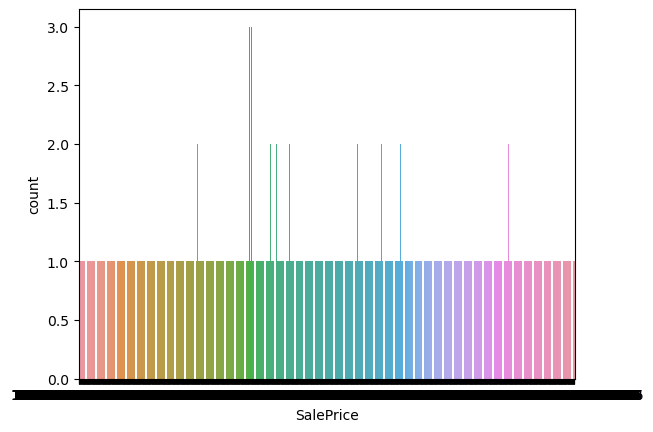

In [41]:
sns.countplot(x='SalePrice' , data=sam_sub )

In [42]:
st= StandardScaler()

# Select the columns to be scaled
columns_to_scale = ['SalePrice' ]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the selected columns
sam_sub[columns_to_scale] = scaler.fit_transform(sam_sub[columns_to_scale])

# Verify the changes
print(sam_sub.head())

   SalePrice
0   0.229797
1   0.356475
2   0.327860
3   0.298618
4   0.102670


# Modeling (Linear Regression)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Building the Linear Regression Model
model = LinearRegression()

In [44]:
train_x= train.drop(columns=[10])
train_y = train[10]
# 10 is the index of column SalePrice

In [45]:
test_x = test
test_y = sam_sub

In [46]:
model.fit(train_x, train_y)

LinearRegression()

In [47]:
y_predict = model.predict(test_x)
y_predict

array([ 0.6218939 ,  0.8184606 ,  0.7247407 , ...,  0.12729738,
       -0.23492385,  0.64838812])

In [48]:
test_y

,SalePrice
0,0.229797
1,0.356475
2,0.327860
3,0.298618
4,0.102670
...,...
1454,0.214746
1455,0.199033
1456,0.572141
1457,0.337049


In [49]:
print(test_y.values)
print("-------------------------")
print(y_predict)

[[0.22979726]
 [0.35647493]
 [0.32785999]
 ...
 [0.57214055]
 [0.33704891]
 [0.35636165]]
-------------------------
[ 0.6218939   0.8184606   0.7247407  ...  0.12729738 -0.23492385
  0.64838812]


In [50]:

# Mean Squared Error and R-squared for model evaluation

mse = mean_squared_error(test_y, y_predict)
r2 = r2_score(test_y, y_predict)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.222769379477297
R-squared: -16.38958720019162
